In [14]:
import cPickle as pickle
import h5py

def PlotSeries(start, stop, text,labels, ylim=None, mod=1, ylim_glob=None):
    plt.figure(figsize=(10,6))
    models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_i_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5')
    h_center_HR = h5py.File('../mod_c/mod_e_center_high_res.hdf5')
    
    print 'log-like, TS:', 'center_high_res_no_dm', np.sum(h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC_no_dm/'].attrs['loglike_total']-h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    print 'log-like, TS:', 'center_high_res', np.sum(h_center_HR['/fit_results/GC/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-h_center_HR['/fit_results/GC/'].attrs['loglike_total'])
    
    fits = []
    ll, ll_no_dm = [], []
    llg1, llg2, llg3, llg4 = [],[],[],[]

    
    for i, model in enumerate(models):
            
#         try:
            h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5', 'r')
            h = h5py.File('../mod_c/'+model)
            
            
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            #print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            
            fit_global = h['/fit_results/global'].attrs
            llg1.append(fit_global['localfval'])
            llg2.append(fit_global['outerfval'])
            llg3.append(fit_global['innerfval'])
            llg4.append(llg1[-1]+llg2[-1]+llg3[-1])
            
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(221)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label=model,capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(222)
            
            #print h_base['/fit_results/GC/'].attrs.keys()
            if i%mod==0:
                TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
                plt.plot(E/1e3, TS)

#         except:
#             ll.append(-1e10)
#             ll_no_dm.append(-1e10)
#             llg1.append(-1e10)
#             llg2.append(-1e10)
#             llg3.append(-1e10)
#             llg4.append(-1e10)
#             print 'no results found for model ', model
    
    
    plt.subplot(223)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(221)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,1e-6)
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-7,2e-6)
    
    plt.subplot(222)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-50,200)
            
    plt.subplot(223)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    
    plt.subplot(224)
    
    # ------------------------------------------------
    # Global fitting plot
    # ------------------------------------------------
    print llg2[1:]
    plt.plot(range(len(labels)), -2*(llg1[1:]-llg1[0]),marker='o',ls=':', markersize=4, color='firebrick', label='Local')
    plt.plot(range(len(labels)), -2*(llg2[1:]-llg2[0]),marker='o',ls=':', markersize=4,color='steelblue', label='Outer')
    plt.plot(range(len(labels)), -2*(llg3[1:]-llg3[0]),marker='o',ls=':', markersize=4,color='goldenrod', label='Inner')
    plt.plot(range(len(labels)), -2*(llg4[1:]-llg4[0]),marker='o',ls=':', markersize=4,color='cyan', label='Total')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim_glob is not None:
        plt.ylim(ylim_glob)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    

def PlotModels(pathList, text,labels, ylim=None):
    plt.figure(figsize=(14,2.5))
    models = ['../base_2D.hdf5'] + pathList
    h_base = h5py.File('../base_2D.hdf5')
    
    fits = []
    ll, ll_no_dm = [], []

    
    for i, model in enumerate(models):
        #try:
        h_base = h5py.File('../base_2D.hdf5')
        h = h5py.File('../mod_c/'+model)
        #try:
        h['/fit_results/GC/'].attrs.keys()
        fit = h['/fit_results/GC'].attrs
        fit_no_dm = h['/fit_results/GC_no_dm'].attrs
        print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
        ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
        ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
        #print fit.keys()
        E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']

        plt.subplot(131)

        if i==0:
            plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                         label=model,capthick=1, capsize=2, ls=':' )
        else:
            plt.errorbar(E/1e3,(E**2*flux/1e3), 
                         label=labels[i-1],capthick=1, capsize=2, ls='-' )

        plt.subplot(132)

        #print h_base['/fit_results/GC/'].attrs.keys()
       
        TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
        plt.plot(E/1e3, TS)

#         except:
#             ll.append(-1e10)
#             ll_no_dm.append(-1e-10)
#             print 'no results found for model ', model
    
    
    plt.subplot(133)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-8,2e-6)
    
    plt.subplot(132)
    plt.ylabel(r'$-\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-200,50)
            
    plt.subplot(133)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)


#PlotModels(['../mod_c/mod_e_center_high_res.hdf5','../mod_c/mod_e_center_high_res_XCO.hdf5'], text='High-Res CR', labels=['HR','HR $X_{CO}$'])



# PEB HI+H2, PEB HI+H2,  PEB HI, PEB H2
##Default Model is $v_a=35$ km/s, $D_0=7.2e28$, $f_{sprl}=.2$, SNR source dist, $z_{max}=3.5$ kpc, $T_s=150$, Mag5

log-like, TS: center_high_res_no_dm -1186161.14316 660.418668218
log-like, TS: center_high_res -1186693.36627 -1480.03352597
[-5147721.9239049442, -4899435.350762927, -4901500.7481243014, -5153440.1520896712, -4900824.5976661183, -5150400.4599731471, -4897622.4452549256, -4895930.687159637, -4894330.3669151003, -4892856.0957131702, -4891514.7578301644, -4890305.311635877, -4889216.5516290981, -4888238.3337691538, -4887359.8607504778, -4886570.8656151667, -4905324.2948361319, -4905075.4215461267, -4905235.2886251314, -4904290.1395501504, -5153514.6266866, -4900778.4877749383, -4898900.5930878092, -4897132.8050924195, -5145433.0098675918, -4894053.3370722104, -5142325.2202432668, -4891565.5742613385, -4890513.8803155832, -4889572.1420814581, -4888728.1504645757, -4887970.9378927443, -4827879.8465927783, -4892184.1539168274, -4895970.7674093889, -4897718.0695434241, -4897795.4571261015, -4896919.0760329319, -4895598.6770544453, -4894125.0048708133, -4892649.4302002387, -4891244.9077439662

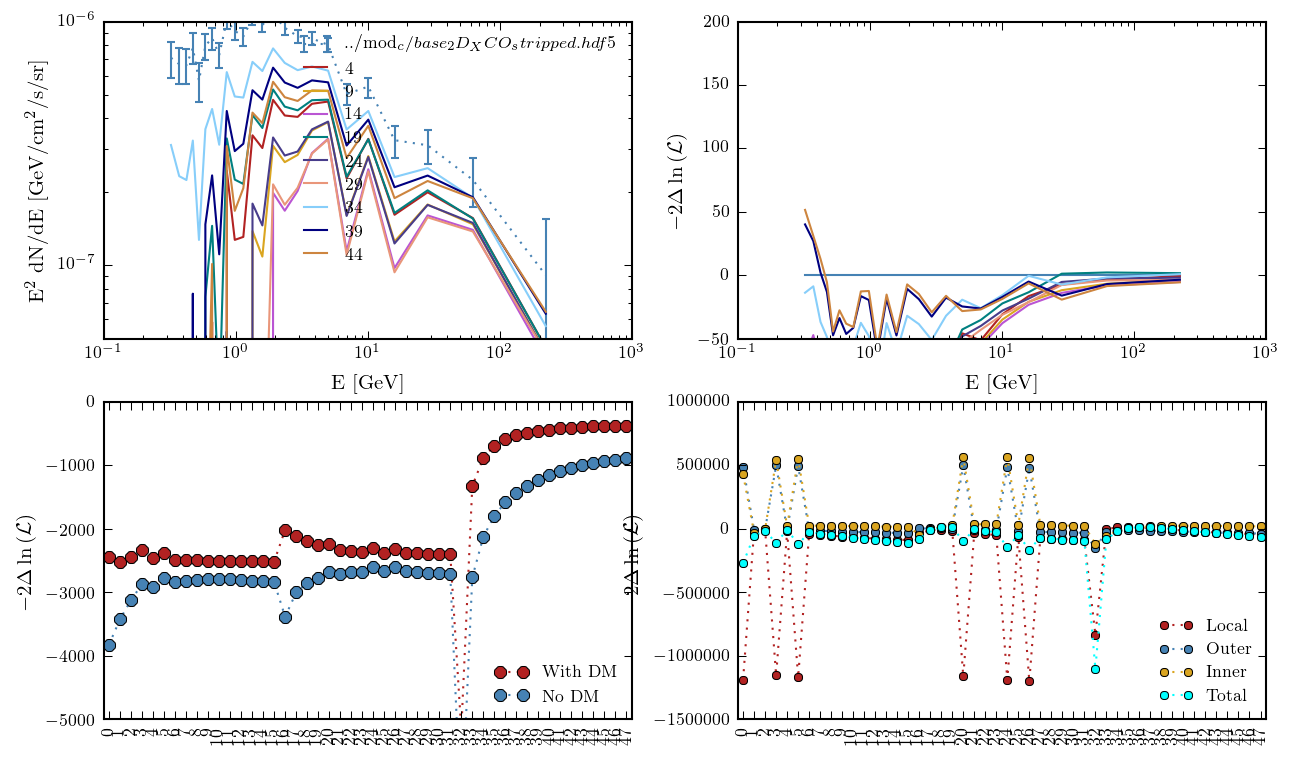

In [15]:
# PlotSeries(start=0, stop=8, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.30,8)], mod=2)
# plt.show()
# PlotSeries(start=8, stop=16, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.75,8)], mod=2,)

PlotSeries(start=0, stop=48, text='Spiral Fraction', labels=[str(i) for i in range(0,48)], mod=5, ylim=(-5e3,0), )
plt.show()


# PEB HI+H2,  PEB HI, PEB H2
##Default Model is $v_a=35$ km/s, $D_0=7.2e28$, $f_{sprl}=.2$, SNR source dist, $z_{max}=3.5$ kpc, $T_s=150$, Mag5

log-like, TS: center_high_res_no_dm -1186161.14316 660.418668218
log-like, TS: center_high_res -1186693.36627 -1480.03352597
[-5147721.9239049442, -4899435.350762927, -4901500.7481243014, -5153440.1520896712, -4900824.5976661183, -5150400.4599731471, -4897622.4452549256, -4895930.687159637, -4894330.3669151003, -4892856.0957131702, -4891514.7578301644, -4890305.311635877, -4889216.5516290981, -4888238.3337691538, -4887359.8607504778, -4886570.8656151667]


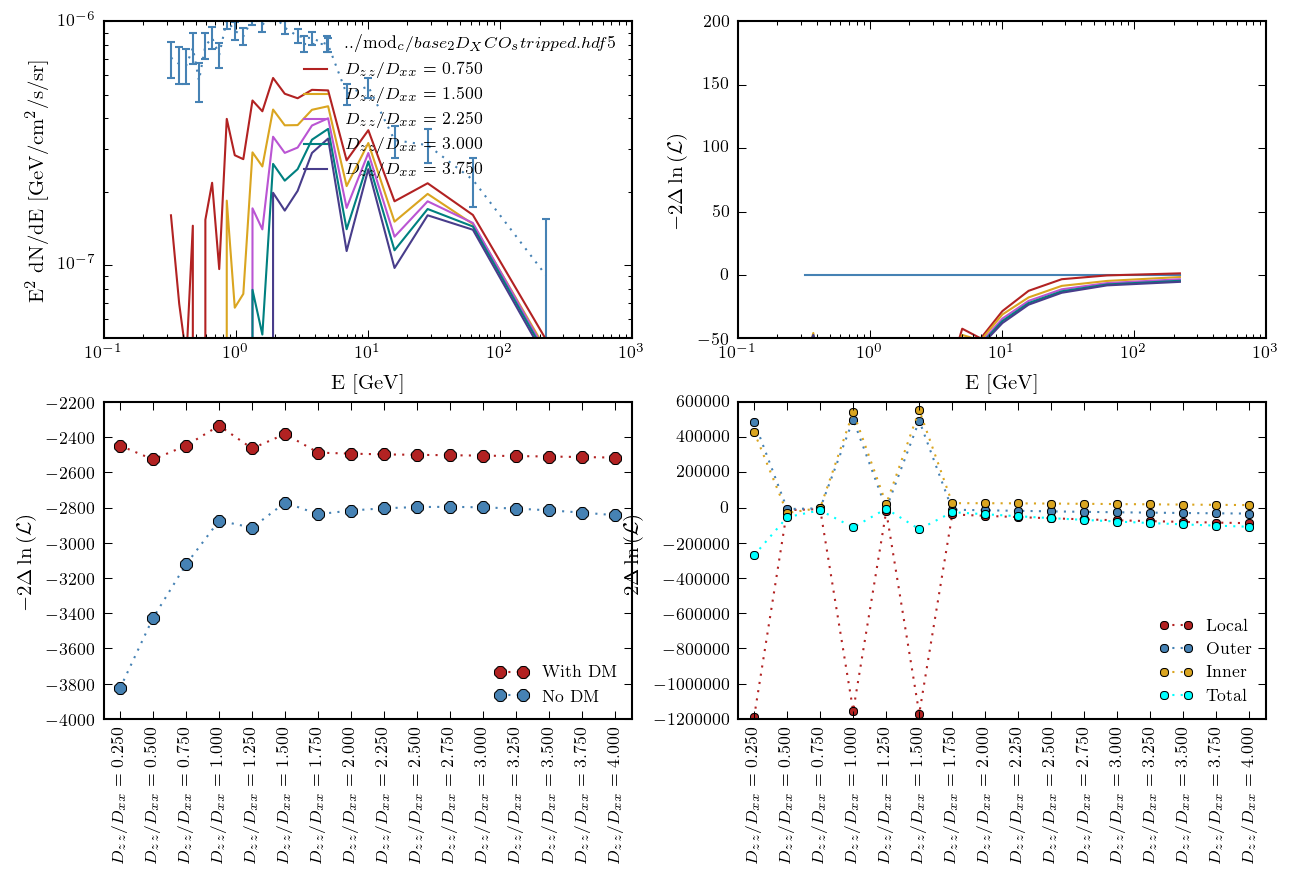

log-like, TS: center_high_res_no_dm -1186161.14316 660.418668218
log-like, TS: center_high_res -1186693.36627 -1480.03352597
[-4905324.2948361319, -4905075.4215461267, -4905235.2886251314, -4904290.1395501504, -5153514.6266866, -4900778.4877749383, -4898900.5930878092, -4897132.8050924195, -5145433.0098675918, -4894053.3370722104, -5142325.2202432668, -4891565.5742613385, -4890513.8803155832, -4889572.1420814581, -4888728.1504645757, -4887970.9378927443]


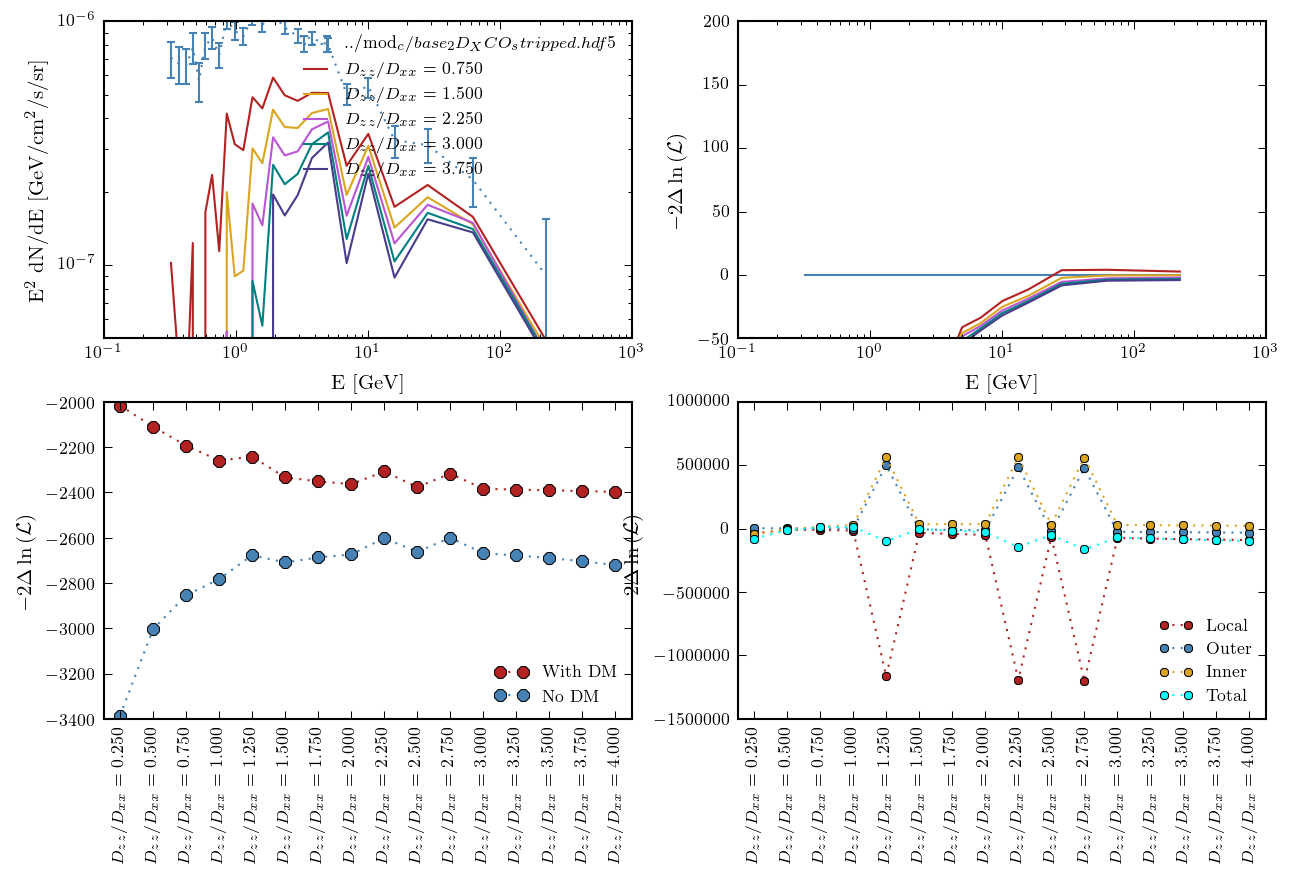

log-like, TS: center_high_res_no_dm -1186161.14316 660.418668218
log-like, TS: center_high_res -1186693.36627 -1480.03352597
[-4827879.8465927783, -4892184.1539168274, -4895970.7674093889, -4897718.0695434241, -4897795.4571261015, -4896919.0760329319, -4895598.6770544453, -4894125.0048708133, -4892649.4302002387, -4891244.9077439662, -4889942.8202878265, -4888753.2830980783, -4887675.0232135523, -4886702.8355418453, -4885828.5214773891, -4885043.3502599979]


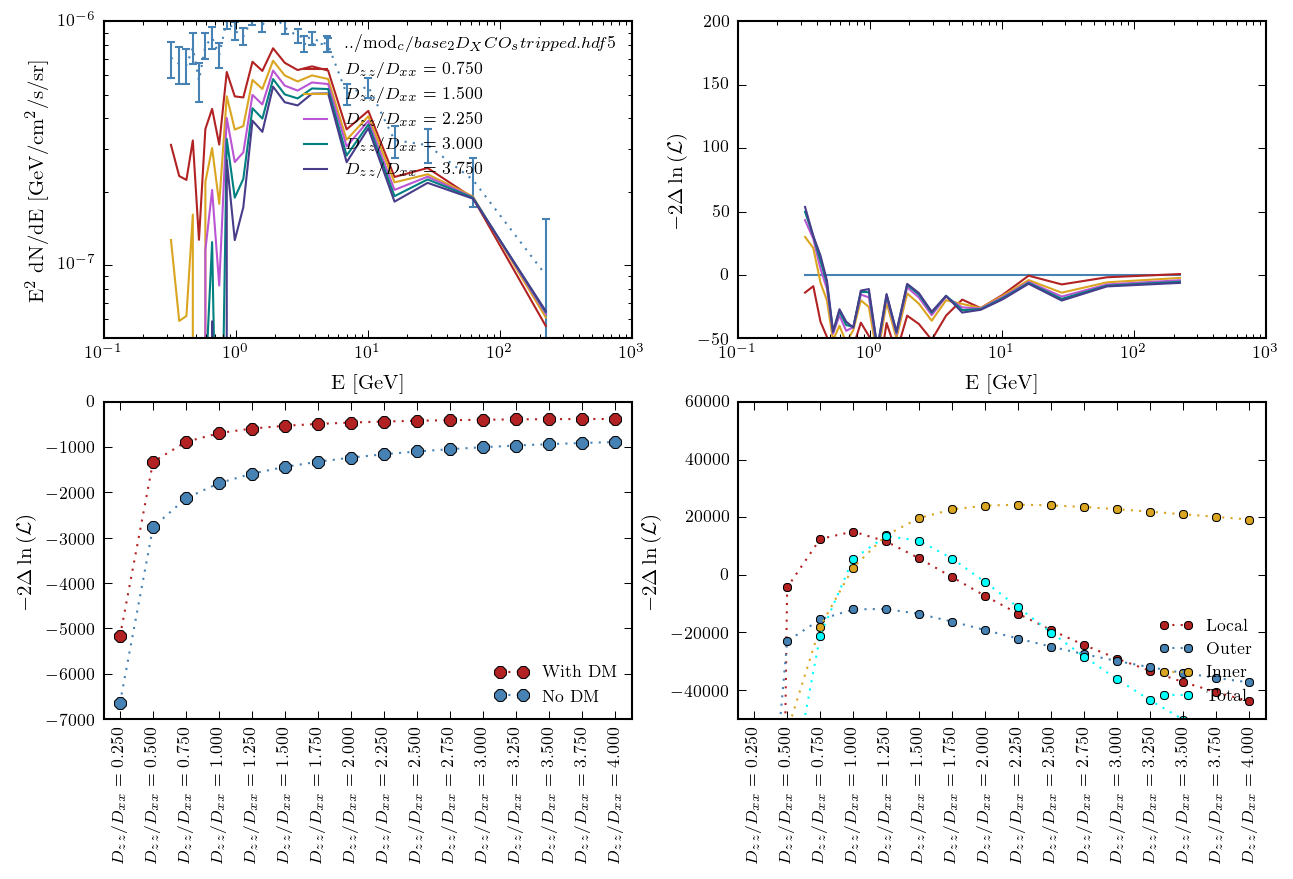

In [16]:

PlotSeries(start=0, stop=16, text='D_{zz}/D_{xx}', labels=[r'$D_{zz}/D_{xx}=%1.3f$'%i for i in np.linspace(.25, 4, 16)], mod=3)
plt.show()
PlotSeries(start=16, stop=32, text='D_{zz}/D_{xx}', labels=[r'$D_{zz}/D_{xx}=%1.3f$'%i for i in np.linspace(.25, 4, 16)], mod=3)
plt.show()
PlotSeries(start=32, stop=48, text='D_{zz}/D_{xx}', labels=[r'$D_{zz}/D_{xx}=%1.3f$'%i for i in np.linspace(.25, 4, 16)], mod=3, ylim_glob=(-5e4,6e4))
plt.show()
